##  Natural Language Processing
#### Final Project
#### Hemanta Rijal (C0835075)

## What is Resume Screening?
This task of selecting the best talent among many others is known as Resume Screening.
Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

## Importing Libraries and load Data

In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [3]:
data = pd.read_csv("./UpdatedResumeDataSet.csv")
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


## 1. Explanatory Data Analysis

In [30]:
# total data
data.shape

(962, 4)

In [29]:
#getting unique job category 
data['Category'].nunique()

25

In [5]:
# count the frequency

category = data['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


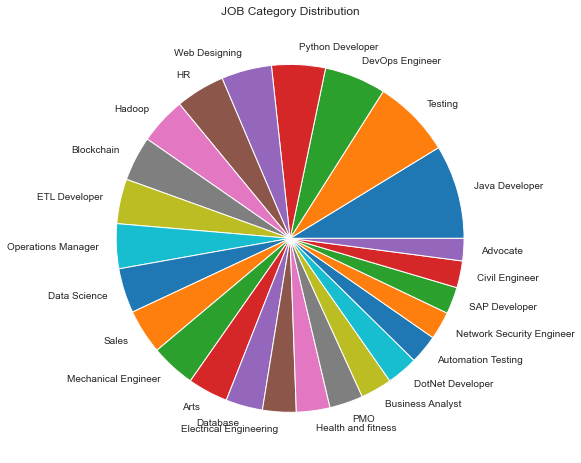

In [6]:
# pie chart plotting
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'])
plt.title('JOB Category Distribution')
plt.show()

## 2. Data Preprocessing

In [7]:
# in this function i removed all the url, punctuations, extra whitespace , implement regular expression and 
# finally converted the result into lowercase

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs 
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = resumeText.lower()
    return resumeText

In [8]:
# implement function and keeping cleaned data into another columns
data['cleaned'] = data['Resume'].apply(lambda x:cleanResume(x))
data.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [9]:
#getting the entire resume text
corpus=" "
for i in range(0,len(data)):
    corpus= corpus+ data["cleaned"][i]
corpus

' skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating th

In [10]:
#tokenize the data
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

410622

## 3. label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Now encode the data
label = LabelEncoder()
data['new_Category'] = label.fit_transform(data['Category'])
data.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6


In [13]:
data['new_Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## 4. Vectorizations 

In [14]:
# Vectorizing the cleaned columns
text = data['cleaned'].values
target = data['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [15]:
WordFeatures.shape

(962, 1500)

## 5. Create and transform features 

In [16]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=42, test_size=0.5)

In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

## 6. Select 2 algorithms and build 2 models 

In [18]:
# i keeped the model into the dictionary in order to build multiple machine larning algorithm and models
models = {
    'Random Forest' : RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1),
    'Support Vector Machine' : SVC(),   
}

In [19]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                      n_estimators=50,
                                                      n_jobs=-1)),
 OneVsRestClassifier(estimator=SVC())]

In [20]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*20)
print("all models trained successfully")

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                     n_estimators=50,
                                                     n_jobs=-1)) trained
OneVsRestClassifier(estimator=SVC()) trained
********************
all models trained successfully


In [21]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [22]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                     n_estimators=50,
                                                     n_jobs=-1)) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.74      1.00      0.85        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        17
           4       1.00      0.65      0.79        17
           5       1.00      0.73      0.85        15
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        12
           8       1.00      0.89      0.94        28
           9       0.94      1.00      0.97        17
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00   

for count, value in enumerate(model_list):
    print(f'{value} confusion_matrix')
    print("-"*80)
    print(cm(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

In [23]:
# confusion_matrix = {}

# for count, value in enumerate(model_list):
#     print(f'{value} Confusion Matrix')
#     print("-"*80)
#     ccm = CM(y_test,model_list[count].predict(X_test))
#     print(ccm)
#     confusion_matrix[value] = ccm
#     print("*"*100)
#     print(" ")

In [24]:
# from sklearn import metrics
# import matplotlib.pyplot as plt

In [25]:
# for count, value in enumerate(model_list):
#     df = pd.DataFrame(confusion_matrix[value],
#                      index = category['index'], 
#                      columns = category['index'])
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix[value], display_labels = [category['index'], category['index']])
#     print(df)
#     cm_display.plot()
#     plt.show()
    

## Cross Validation for Models

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [27]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [28]:
print("r2 scores")
print("*********************************")
for name, result in results.items():
   
    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

r2 scores
*********************************
OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                     n_estimators=50,
                                                     n_jobs=-1)) : 0.967
----------------
OneVsRestClassifier(estimator=SVC()) : 0.99
----------------


## Conclusion
I implement the two model (we can dynamically add more model on it) i.e RandomForestClassifier and support vector classifier. While evaulating the classification report, Support Vector classification report gives more precision (Accuracy of positive predictions), more recall (Fraction of positives that were correctly identified.) and more accuracy than random forest classifier.  

Moreover, I did   kFold cross validation for model and calcualte the R2 score, which also gives better result for support vector. 
Hence although, both model perform extremely well (more than 90%) , support vector performs well and gives the best result. Therefor I choose support vector for production. 